# 4.1 - Convolutions

In [1]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.io import imread
from scipy import signal
%matplotlib inline
tf.__version__

'2.4.1'

## Convolutions of functions

A convolution is a mathematical operations that receives as **input two functions** and produces as **output another function**.

The intuition is that one input function **sweeps over** the second input function and they get multiplied along the way.

See [Wikipedia:Convolution](https://en.wikipedia.org/wiki/Convolution)

$$(f*g)(t) = \int_{-\infty}^\infty f(t)g(t-\tau)d\tau$$

In [2]:
f = lambda x: ((x>1) & (x<2)).astype(int)
g = lambda x: ((x>1) & (x<2)).astype(int)

x = np.linspace(-1,4,1000)
c = np.convolve(f(x),g(x), "same")
c = c/np.max(c)

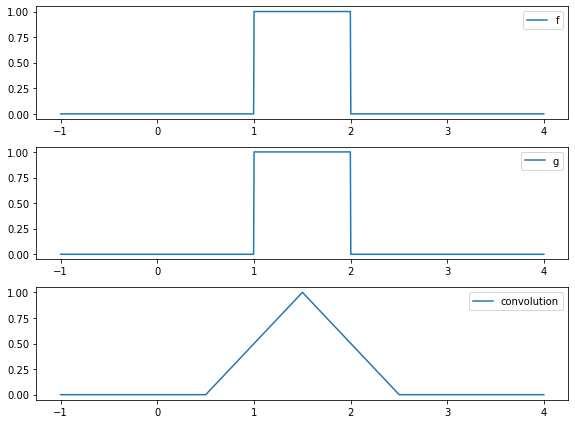

In [3]:
plt.figure(figsize=(8,6))
plt.subplot(311); plt.plot(x,f(x), label="f"); plt.legend()
plt.subplot(312); plt.plot(x,g(x), label="g"); plt.legend()
plt.subplot(313); plt.plot(x,c, label="convolution"); plt.legend()
plt.tight_layout()

## Convolution is just multiplication and adding

In a discrete setting, integration becomes summation.

$$(f*g)[t] = \sum_{i=-\infty}^{+\infty} f[t]g[t-i]$$


In [4]:
a = np.r_[0,0,1,1,1,0,0]
b = np.r_[0,0,1,1,1,0,0]
np.convolve(a,b)

array([0, 0, 0, 0, 1, 2, 3, 2, 1, 0, 0, 0, 0])

observe each convolution step is just an element by element multiplication of vectors and a sumation of the resulting elements.

In [5]:
for i in range(len(a)*2-1):
    pa, pb = (a[:i+1], b[-i-1:]) if i < len(a) else (a[i-len(a)+1:], b[:-(i-len(a))-1])
    print ((pa*pb).sum(), "=", pa, "*", pb)

0 = [0] * [0]
0 = [0 0] * [0 0]
0 = [0 0 1] * [1 0 0]
0 = [0 0 1 1] * [1 1 0 0]
1 = [0 0 1 1 1] * [1 1 1 0 0]
2 = [0 0 1 1 1 0] * [0 1 1 1 0 0]
3 = [0 0 1 1 1 0 0] * [0 0 1 1 1 0 0]
2 = [0 1 1 1 0 0] * [0 0 1 1 1 0]
1 = [1 1 1 0 0] * [0 0 1 1 1]
0 = [1 1 0 0] * [0 0 1 1]
0 = [1 0 0] * [0 0 1]
0 = [0 0] * [0 0]
0 = [0] * [0]


the `mode` argument to convolve regulates `padding`

In [6]:
np.convolve(a,b, mode="same")

array([0, 1, 2, 3, 2, 1, 0])

Of course, the functions can have any values, and not necessarily be the same, and we assume there is infinity zero padding on both arguments, so they **do not have to be the same size**.

In this case:

- `a` is considered the **source signal**
- `b` is considered the **filter**

In [7]:
a = np.r_[0,0,1,1,1,0,0]
b = np.r_[1,0,1]
np.convolve(a,b)

array([0, 0, 1, 1, 2, 1, 1, 0, 0])

## Convolution with images

It is simply sweeping in both directions 


In [104]:
img = imread("local/imgs/cars-driving.jpg").mean(axis=2)
img = (img-np.min(img))/(np.max(img)-np.min(img)) # normalize to 0,1
img.shape, np.min(img), np.max(img)

((278, 493), 0.0, 1.0)

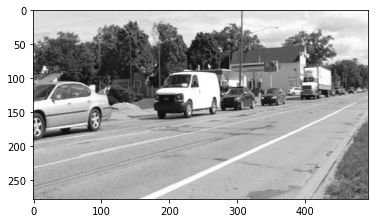

In [105]:
plt.imshow(img, cmap=plt.cm.Greys_r)

a conv 2D is just the same element by element multiplication and summation.

In [112]:
f1 = np.r_[[[-1,-1], [1,1]]]
print (f1)
c1 = signal.convolve2d(img, f1, mode="valid")

[[-1 -1]
 [ 1  1]]


doing manually the first pixel of the resulting img

In [119]:
c1[0,1], (img[:2,:2]*f1).sum()

(0.002645502645502562, -0.002645502645502562)

and this filter has a border detection effect.

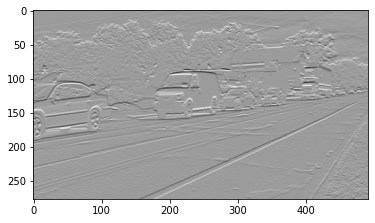

In [30]:
plt.imshow(c1, cmap=plt.cm.Greys_r)

 We use `abs` con convert all differences into positive, since we do not care the *direction* of edges.

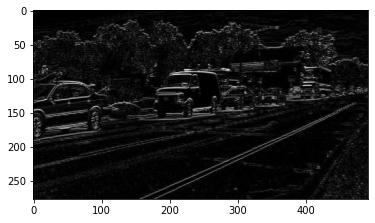

In [31]:
plt.imshow(np.abs(c1), cmap=plt.cm.Greys_r)

and a filter for vertical edge detection

[[ 1 -1]
 [ 1 -1]]


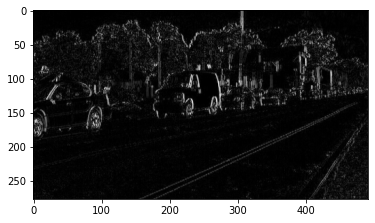

In [32]:
f2 = np.r_[[[1,-1], [1,-1]]]
print(f)
c2 = signal.convolve2d(img, f2, mode="valid")
plt.imshow(np.abs(c2), cmap=plt.cm.Greys_r)

combining both outputs

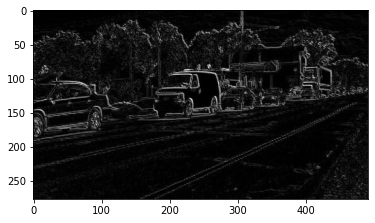

In [33]:
plt.imshow(np.abs(c1+c2), cmap=plt.cm.Greys_r)

a blurring filter

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


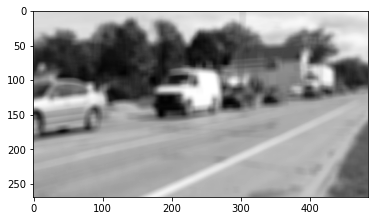

In [16]:
f = np.ones((10,10))
print(f)
c = signal.convolve2d(img, f, mode="valid")
plt.imshow(np.abs(c), cmap=plt.cm.Greys_r)

## In Tensorflow in just the same

TF usually expects an array of imgs of shape

    (n_imgs, pixels_width, pixels_height, n_channels)

In [120]:
# reshape image
img = imread("local/imgs/cars-driving.jpg").mean(axis=2)
img = (img-np.min(img))/(np.max(img)-np.min(img)) # normalize to 0,1
img = img.reshape(1,*img.shape,1)
img.shape

(1, 278, 493, 1)

we want one filter of size `2x2`

In [121]:
c = tf.keras.layers.Conv2D(filters=1, kernel_size=2, activation="linear", padding="same")
c.build(input_shape=(img.shape))

In [122]:
for w in c.weights:
    print (w)

<tf.Variable 'kernel:0' shape=(2, 2, 1, 1) dtype=float32, numpy=
array([[[[-0.45081097]],

        [[ 0.6782841 ]]],


       [[[ 0.31860155]],

        [[-0.4256522 ]]]], dtype=float32)>
<tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


manually set the filter values

In [123]:
c.set_weights([ np.r_[[[-1,-1], [1,1]]].reshape(2,2,1,1), np.r_[0]])

In [124]:
cimg = c(img)
cimg.shape

TensorShape([1, 278, 493, 1])

In [125]:
cimg[0,0,0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.00264549], dtype=float32)>

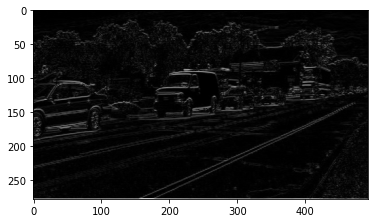

In [93]:
plt.imshow(np.abs(cimg.numpy()[0,:,:,0]), cmap=plt.cm.Greys_r)

In [94]:
cimg[0,0,0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.00264549], dtype=float32)>

In [97]:
(img[0,:2,:2,0]*np.r_[[[-1,-1], [1,1]]]).sum()

-0.002645502645502562

activations are simply applied to the output. Observe how a `relu` activation with an horizontal edge detection filter detects edges in **one direction**

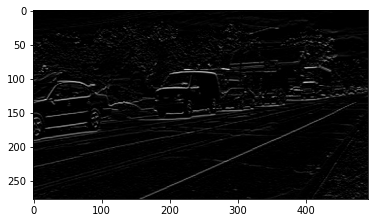

In [44]:
c = tf.keras.layers.Conv2D(filters=1, kernel_size=2, activation="relu", padding="valid")
c.build(input_shape=(img.shape))
c.set_weights([ np.r_[[[-1,-1], [1,1]]].reshape(2,2,1,1), np.r_[0]])
plt.imshow(c(img).numpy()[0,:,:,0], cmap=plt.cm.Greys_r)

or the other direcction inverting the filter

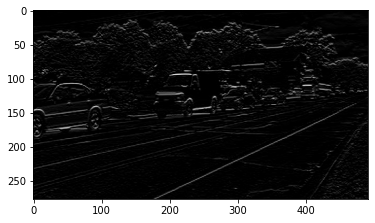

In [45]:
c = tf.keras.layers.Conv2D(filters=1, kernel_size=2, activation="relu", padding="valid")
c.build(input_shape=(img.shape))
c.set_weights([ np.r_[[[1,1], [-1,-1]]].reshape(2,2,1,1), np.r_[0]])
plt.imshow(c(img).numpy()[0,:,:,0], cmap=plt.cm.Greys_r)

for color images, filters also have to have three channels

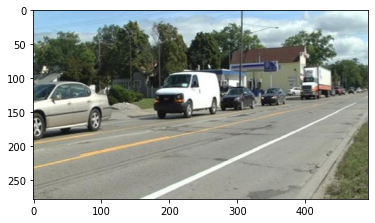

In [46]:
img = imread("local/imgs/cars-driving.jpg")
img = (img-np.min(img))/(np.max(img)-np.min(img)) # normalize to 0,1
img = img.reshape(1, *img.shape)
plt.imshow(img[0])


In [47]:
f = -np.ones((3,3,3))*1.5
f[:,:,0] = 1.5
f

array([[[ 1.5, -1.5, -1.5],
        [ 1.5, -1.5, -1.5],
        [ 1.5, -1.5, -1.5]],

       [[ 1.5, -1.5, -1.5],
        [ 1.5, -1.5, -1.5],
        [ 1.5, -1.5, -1.5]],

       [[ 1.5, -1.5, -1.5],
        [ 1.5, -1.5, -1.5],
        [ 1.5, -1.5, -1.5]]])

In [48]:
c = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation="sigmoid", padding="valid")
c.build(input_shape=(img.shape))
c.set_weights([ f.reshape(3,3,3,1), np.r_[0]])

In [49]:
cimg = c(img).numpy()
cimg.shape

(1, 276, 491, 1)

observe how **very pure** red is detected (hand crafted filter is difficult to tune)

(-0.5, 490.5, 275.5, -0.5)

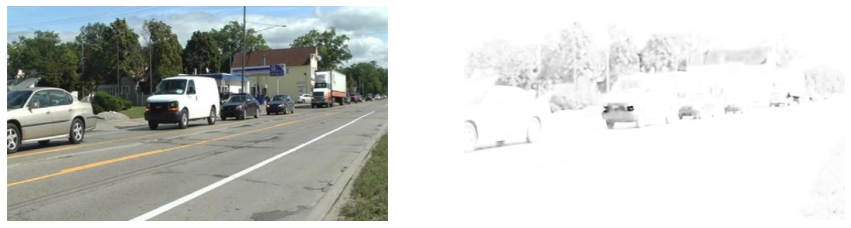

In [50]:
plt.figure(figsize=(15,10))
plt.subplot(121); plt.imshow(img[0,:,:]); plt.axis("off")
plt.subplot(122); plt.imshow(cimg[0,:,:,0], cmap=plt.cm.Greys); plt.axis("off")

detect green (little)

(-0.5, 490.5, 275.5, -0.5)

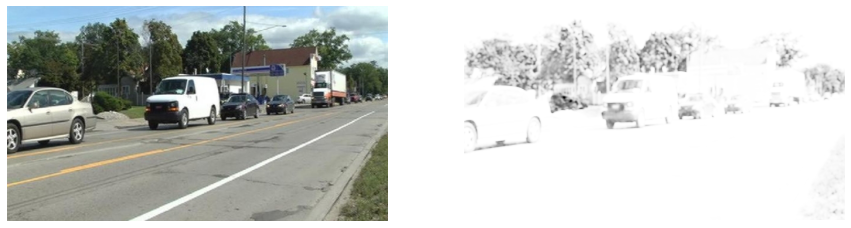

In [51]:
f = -np.ones((3,3,3))*1.5
f[:,:,1] = 1.5
c.set_weights([ f.reshape(3,3,3,1), np.r_[0]])
plt.figure(figsize=(15,10))
cimg = c(img).numpy()

plt.subplot(121); plt.imshow(img[0,:,:]); plt.axis("off")
plt.subplot(122); plt.imshow(cimg[0,:,:,0], cmap=plt.cm.Greys); plt.axis("off")

detect blue (little tolerace)

(-0.5, 490.5, 275.5, -0.5)

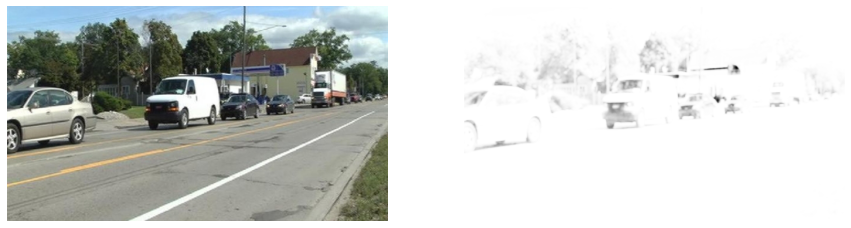

In [52]:
f = -np.ones((3,3,3))*1.5
f[:,:,2] = 1.5
c.set_weights([ f.reshape(3,3,3,1), np.r_[0]])
plt.figure(figsize=(15,10))
cimg = c(img).numpy()

plt.subplot(121); plt.imshow(img[0,:,:]); plt.axis("off")
plt.subplot(122); plt.imshow(cimg[0,:,:,0], cmap=plt.cm.Greys); plt.axis("off")